# (LAB: 9) K-Means Clustering

> Name: Debatreya Das <br>
> Roll No. 12212070 <br>
> CS A4 <br>
> Data Mining Lab 9

Dataset used
[Mall Customers](./assets/mall_customers.csv)

K-Means clustering is an unsupervised machine learning algorithm used to partition data into distinct groups or clusters based on similarity. The algorithm aims to minimize the variance within each cluster, creating groups where data points are more similar to each other than to those in other clusters.

The K-Means algorithm involves these main steps:

1. **Initialization**: Select `k` initial centroids randomly, where `k` is the number of clusters chosen in advance.
2. **Assignment**: Each data point is assigned to the nearest centroid, forming `k` clusters.
3. **Update**: Calculate the mean of all points within each cluster to update the centroids.
4. **Repeat**: Steps 2 and 3 are repeated until the centroids stabilize or change only minimally (convergence).

K-Means is popular for its simplicity and effectiveness in tasks like market segmentation, image compression, and anomaly detection. However, it has some limitations, such as sensitivity to the initial placement of centroids and difficulties with clusters of non-spherical shapes or varying densities.

## CODE

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
# Load the dataset
data = pd.read_csv("./assets/mall_customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preprocessing

In [3]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Select the 'Annual Income (k$)' and 'Spending Score (1-100)' columns
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### KMeans

#### Define Helper Functions for K-Means

In [4]:
# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

#### Implement the K-Means Algorithm

In [5]:
# Initialize centroids randomly
def initialize_centroids(X, k):
    np.random.seed(0)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

# Assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters.append(closest_centroid)
    return np.array(clusters)

# Update the centroids by calculating the mean of all points in each cluster
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = cluster_points.mean(axis=0)
        else:
            new_centroid = X[np.random.choice(X.shape[0])]
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# Full K-means algorithm implementation
def k_means(X, k, max_iterations=100, tolerance=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        diff = np.linalg.norm(new_centroids - centroids)
        if diff < tolerance:
            break
        centroids = new_centroids
    return clusters, centroids


### Run K-Means and Visualize the Clusters

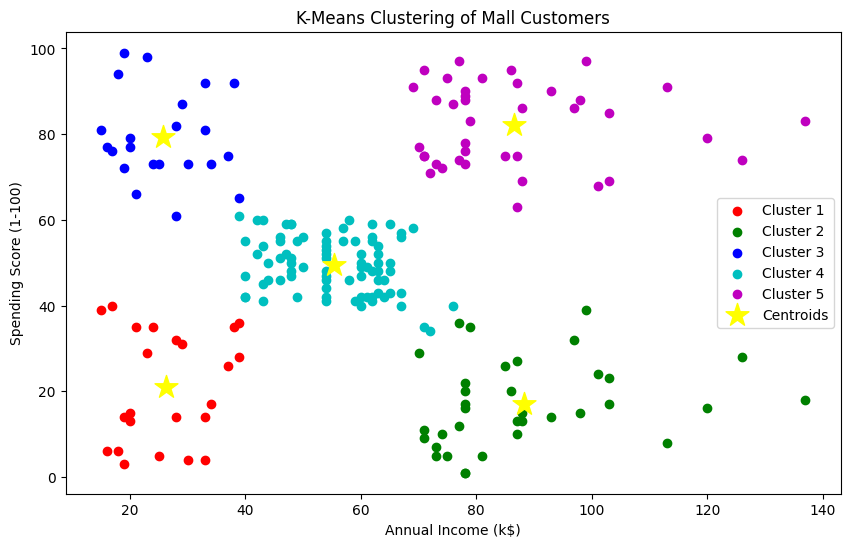

In [6]:
# Set number of clusters and run K-means
k = 5
clusters, centroids = k_means(X, k)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title("K-Means Clustering of Mall Customers")
plt.show()

### Calculate WCSS for Model Evaluation

To evaluate the clustering performance, we'll calculate the Within-Cluster Sum of Squares (WCSS). This helps assess the compactness of clusters, where lower values indicate better clustering.

In [7]:
# Function to calculate WCSS (inertia)
def calculate_wcss(X, clusters, centroids):
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Calculate WCSS for the trained model
wcss = calculate_wcss(X, clusters, centroids)
print(f"Within-Cluster Sum of Squares (WCSS): {wcss}")

Within-Cluster Sum of Squares (WCSS): 44448.45544793371


### Elbow Method for Optimal k

The elbow method helps find the ideal number of clusters by plotting WCSS across different `k` values and identifying the "elbow" point.

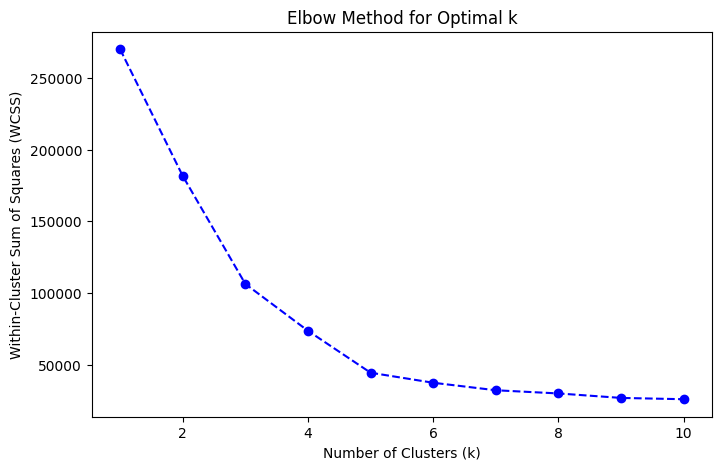

In [8]:
# Testing WCSS for different values of k
wcss_values = []
k_values = range(1, 11)

for k in k_values:
    clusters, centroids = k_means(X, k)
    wcss = calculate_wcss(X, clusters, centroids)
    wcss_values.append(wcss)

# Plotting the WCSS values
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Test on Unseen Data

In [9]:
# Simulate unseen data (you can also load real unseen data if available)
unseen_data = np.array([
    [40, 60],   # Point with moderate income and spending score
    [70, 90],   # Point with high income and high spending score
    [20, 30],   # Point with low income and low spending score
])

# Function to predict cluster for each new point based on trained centroids
def predict_clusters(unseen_data, centroids):
    predictions = []
    for point in unseen_data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        predictions.append(closest_centroid)
    return np.array(predictions)

# Use centroids from the trained model
predicted_clusters = predict_clusters(unseen_data, centroids)
print("Unseen Data Points:\n", unseen_data)
print("Predicted Clusters for Unseen Data:", predicted_clusters)

Unseen Data Points:
 [[40 60]
 [70 90]
 [20 30]]
Predicted Clusters for Unseen Data: [3 4 0]


### Visualize Unseen Data with Original Clusters

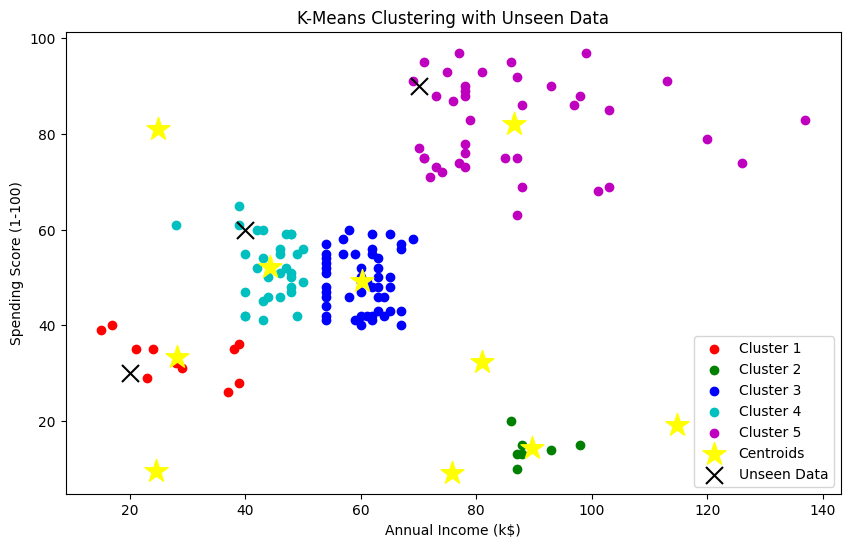

In [11]:
# Ensure that the necessary variables are defined
k = 5  # Number of clusters
# Plot the original clusters and centroids
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', label='Centroids')

# Plot unseen data points with a different marker
plt.scatter(unseen_data[:, 0], unseen_data[:, 1], s=150, c='black', marker='x', label='Unseen Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title("K-Means Clustering with Unseen Data")
plt.show()